In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib_venn import venn2
from utils.feature_analyzer import *

## Load in data

In [203]:
RANDOM_STATE = 42

# Load in data (go back two parent directories)
df = pd.read_csv('../../data/investigation_train_large_checked.csv')
# Load in data descriptions
data_desc = pd.read_csv('../../data/data_description.csv', encoding='ISO-8859-1')

# Replace dutch for english names
name_mapping = dict(zip(data_desc['Feature (nl)'], data_desc['Feature (en)']))
# Rename the columns in the `data` DataFrame
df.rename(columns=name_mapping, inplace=True)

# Show data head
df.head()

,address_number_personal_records_database_addresses,address_number_different_districts,address_number_mail_address,address_number_residential_address_manual,address_days_at_address,address_latest_part_rotterdam,address_latest_neighborhood_groot_ijsselmonde,address_latest_neighborhood_new_westen,address_latest_neighborhood_other,address_latest_neighborhood_olde_north,...,type_hist_ind,type_hist_care_sector,type_ind,type_indication_secret_data,type_other,type_transport_logistics_horticulture,type_care_cleaning_wellbeing,Ja,Nee,checked
0,1,1,0,0,23240,1,0,0,0,0,...,1,0,0,0,0,0,0,0.617698,0.382302,False
1,4,2,1,1,1971,1,0,0,1,0,...,1,0,1,0,1,0,0,0.602167,0.397833,False
2,6,4,2,1,7247,0,0,0,1,0,...,1,0,1,0,0,0,0,0.512377,0.487623,False
3,3,2,0,1,8060,1,0,0,1,0,...,1,0,0,0,0,0,0,0.717796,0.282204,True
4,3,2,0,0,18705,1,0,0,0,0,...,1,0,1,0,0,0,0,0.705484,0.294516,True


## Check columns/features & scale data description

In [204]:
# Check the features/columns
chunk_size = 25  # Number of column names per group
columns = df.columns.tolist()

# print in groups for better overview
for i in range(0, len(columns), chunk_size):
    print(columns[i:i + chunk_size])

# Scale importance from 0 to 1    
scaler = MinMaxScaler()
data_desc['Relative importance'] = scaler.fit_transform(data_desc[['Relative importance']])

['address_number_personal_records_database_addresses', 'address_number_different_districts', 'address_number_mail_address', 'address_number_residential_address_manual', 'address_days_at_address', 'address_latest_part_rotterdam', 'address_latest_neighborhood_groot_ijsselmonde', 'address_latest_neighborhood_new_westen', 'address_latest_neighborhood_other', 'address_latest_neighborhood_olde_north', 'address_latest_neighborhood_vreewijk', 'address_latest_place_other', 'address_latest_place_rotterdam', 'address_latest_district_charlois', 'address_latest_district_delfshaven', 'address_latest_district_feijenoord', 'address_latest_district_ijsselmonde', 'address_latest_district_kralingen_c', 'address_latest_district_north', 'address_latest_district_other', 'address_latest_district_prins_alexa', 'address_latest_district_city_center', 'address_unique_districts_ratio', 'appointment_registration_closed', 'appointment_number_words']
['appointment_past_year_appointment_plan', 'appointment_past_year_

## Visualise relative importance (top 20)

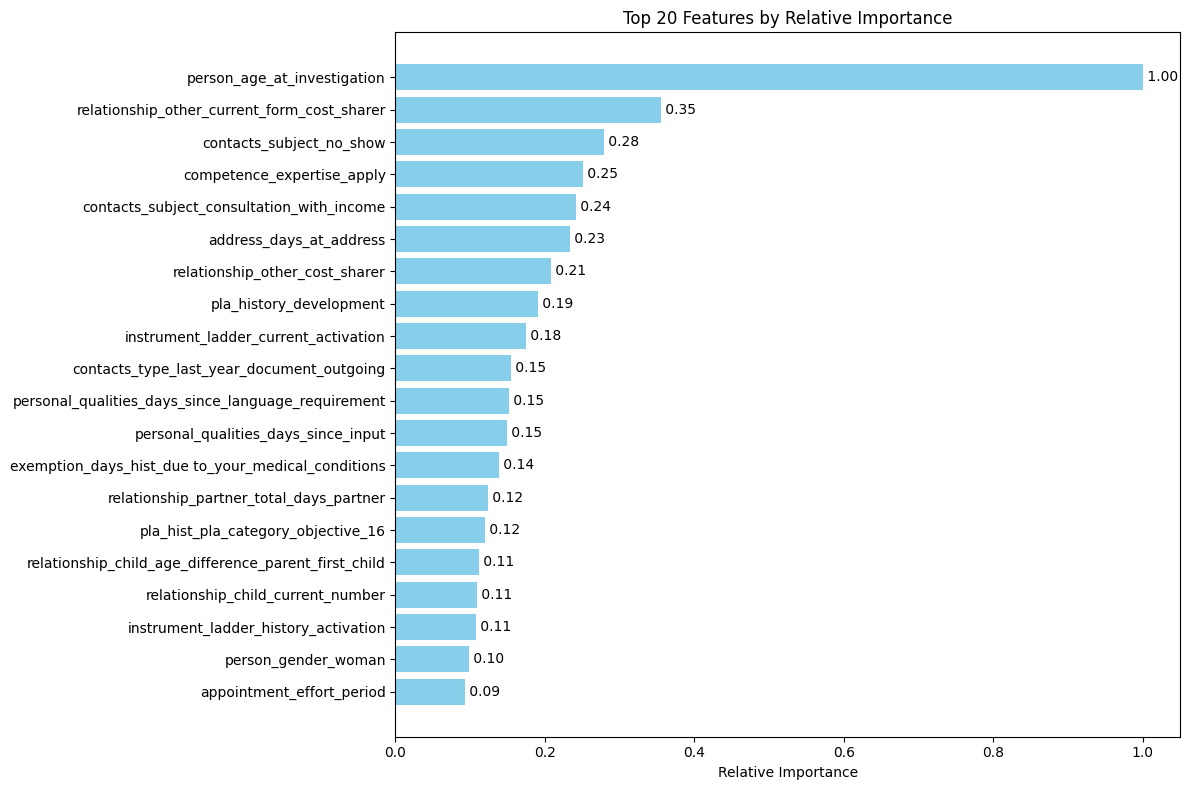

In [205]:
# Sort features on high to low importance
data_desc_sorted = data_desc.sort_values(by='Relative importance', ascending=False)
# Select the top 10 features
top_20 = data_desc_sorted.head(20)
# For better visualization, reverse the DataFrame to have the highest importance at the top
top_20 = top_20[::-1]

# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Create a horizontal bar chart
plt.barh(top_20['Feature (en)'], top_20['Relative importance'], color='skyblue')

# Add labels and title
plt.xlabel('Relative Importance')
plt.title('Top 20 Features by Relative Importance')

# Display the values on the bars
for index, value in enumerate(top_20['Relative importance']):
    plt.text(value, index, f' {value:.2f}', va='center')

# Show the plot
plt.tight_layout()
plt.show()


## Permutation feature importance evaluation

### Evaluate/load in feature importance

In [206]:
# Evaluation of features using permutation importance
fa = FeatureAnalyzer()
# fa.evaluate_importance(dataframe=df, target='checked', add_drop=['Ja', 'Nee']) # Uncomment this line if you don't have the feature_importance.pkl file
fa.load_importance(filepath='feature_importance.pkl')

# Select original training data
X = df.drop(['checked', 'Ja', 'Nee'], axis=1)
y = df['checked']

# Convert permutation importance to dictionary
perm_import = fa.feature_importance_as_dict(column_names=X.columns, normalize=True)
# Convert to pd series and sort from high to low
perm_import = pd.Series(perm_import)
# sort from high to low
sorted_perm = perm_import.sort_values(ascending=False) 
sorted_perm.head()

pla_history_development                        1.000000
person_age_at_investigation                    0.601785
relationship_other_cost_sharer                 0.334837
relationship_other_current_form_cost_sharer    0.316179
pla_hist_pla_category_objective_16             0.226263
dtype: float64

### Visualisation of permutation  importance

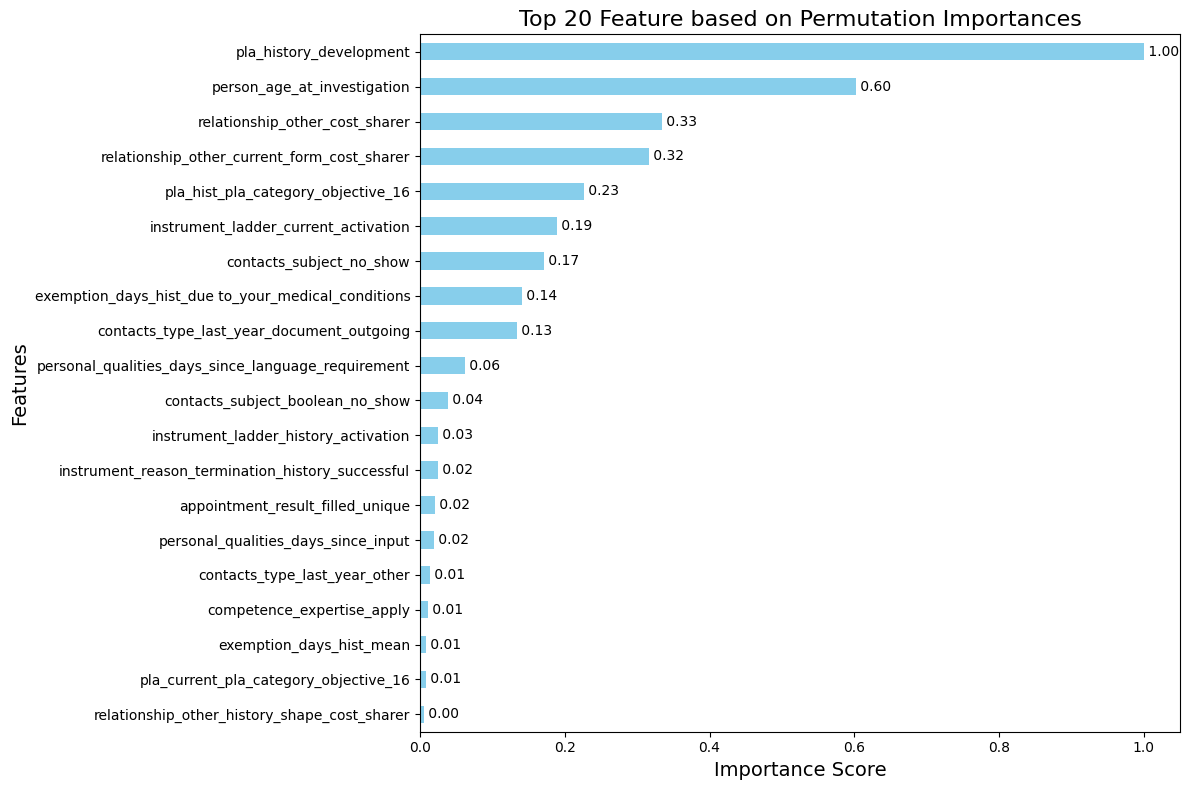

In [207]:
# Get top 20
top_20 = sorted_perm.head(20)
top_20_sorted = top_20.sort_values(ascending=True)

# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Create a horizontal bar chart
top_20_sorted.plot(kind='barh', color='skyblue')

# Add titles and labels
plt.title('Top 20 Feature based on Permutation Importances', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
# Display sorted value
for i, (value, feature) in enumerate(zip(top_20_sorted.values, top_20_sorted.index)):
    plt.text(value, i, f' {value:.2f}', va='center')
# Enhance layout for better spacing
plt.tight_layout()
# Display the plot
plt.show()

## Merge non-zero importance features

In [208]:
# Define threshold for importance
treshold = 0.01
# Count and remove features with 0 relative importance from data description
num_data_desc = (data_desc['Relative importance'] == 0).sum()
filtered_data_desc = data_desc[data_desc['Relative importance'] > treshold]
print(f"Number of features with 0 relative importance removed: {num_data_desc}")

# Count and remove features with 0 importance from permutation importance
num_perm = (perm_import == 0).sum()
filtered_perm_importance = perm_import[perm_import > treshold]
print(f"Number of permutation features with 0 importance removed: {num_perm}")

# Convert both to set of (english) features
desc_set = set(filtered_data_desc['Feature (en)'].tolist())
perm_set = set(filtered_perm_importance.keys().tolist())

# Find common features
common_features = desc_set.intersection(perm_set)
num_common = len(common_features)
print(f"Number of common features: {num_common}")

# Calculate Jaccard Similarity between data desc and perm importance
jaccard_similarity = len(common_features) / len(desc_set | perm_set)
print(f"Jaccard Similarity: {jaccard_similarity:.3f}")

# Convert the merged set back to a list
merged_features = desc_set | perm_set
print(f"Total number of unique features after merging: {len(merged_features)}")
# print(merged_features)

Number of features with 0 relative importance removed: 63
Number of permutation features with 0 importance removed: 221
Number of common features: 16
Jaccard Similarity: 0.138
Total number of unique features after merging: 116


### Visualise overlap in Venn diagram

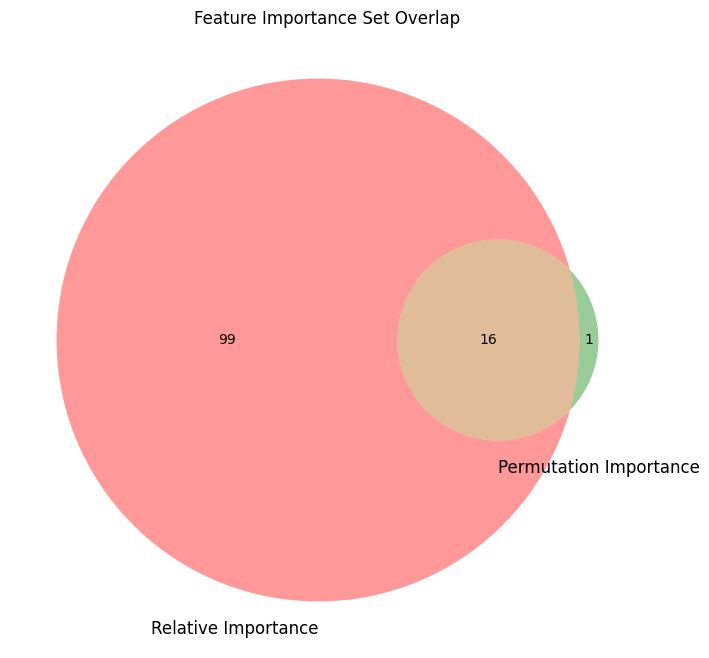

In [209]:
plt.figure(figsize=(10, 8))
venn2([desc_set, perm_set], set_labels=('Relative Importance', 'Permutation Importance'))
plt.title('Feature Importance Set Overlap')
plt.show()

### Custom manual feature selection for extra bias

In [210]:
# All features - merged features
all_features = data_desc['Feature (en)'].tolist()
removed_features = set(all_features) - merged_features

# Get new csv based on all removed features including its description
removed_features_df = data_desc[data_desc['Feature (en)'].isin(removed_features)]
removed_features_df[['Feature (en)', 'Variable description', 'Additional explanation']].to_csv('removed_features.csv', index=False)

# Select all features that contain adresses from all_features column
bias_features = [feature for feature in removed_features_df['Feature (en)'] if 'address' in feature]
# Add in language problems
bias_features.extend([feature for feature in removed_features_df['Feature (en)'] if 'personal_qualities_nl' in feature]) # Every feature that contains personal_qualities_nl
# Other language problems
bias_features.extend(['obstacle_hist_language','contacts_subject_boolean_language_requirement_fulfilled', 'personal_qualities_en_understanding3', 
                      'personal_qualities_language_other', 'personal_qualities_language_requirement_writing_ok'])

# Add in physical and psychological (health) problems
bias_features.extend(['obstacle_hist_physical_problems', 'obstacle_hist_psychological_problems', 'contacts_subject_boolean_sick_or_absent', 
                      'contacts_subject_boolean_care', 'obstacle_psychological_problems', 'availability_current_deviating_due_to_medical_conditions',
                      'contacts_subject_sick_or_absent', 'exemption_reason_hist_medical_grounds'
                      ])

# Add in potential financial/social problems
bias_features.extend(['contacts_subject_boolean_financial_situation','contacts_subject_boolean_income','contacts_subject_boolean_consultation_with_income',
                      'exemption_reason_hist_because of_social_social_situation'])

# Combine the bias features with the merged importance features
new_features = set(bias_features).union(merged_features)
# Amount of new features
print(f'Amount of new features: {len(new_features)}')

# Add back in the target features for training
new_features = list(new_features)
new_features.extend(['checked', 'Ja', 'Nee'])

Amount of new features: 152


## ML model training

In [211]:
from sklearn.model_selection import train_test_split
import onnxruntime as rt
import onnx
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import to_onnx
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from skl2onnx import convert_sklearn

### Preprocess data / selection

In [212]:
# Create biased dataset of only selected features
df_bias = df[new_features]
df_bias.head()
# TBD: DO SOME PREPROCESSING ON SELECTED FEATURES: DATA MINORITY/MAJORITY CLASSES - DATA BALANCING
X_biased = df_bias.drop(['checked', 'Ja', 'Nee'], axis=1)
y_biased = df_bias['checked']

### Training set selection

In [213]:
# Let's split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Let's split the processed dataset into train and test
X_biased_train, X_biased_test, y_biased_train, y_biased_test = train_test_split(X_biased, y_biased, test_size=0.25, random_state=42)

# Select data based on variance (not the final version yet, for now just for testing)
selector = VarianceThreshold()

# Select data based on variance (not the final version yet, for now just for testing)
biased_selector = VarianceThreshold()

# Define a gradient boosting classifier
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

processed_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

pipeline = Pipeline(steps=[('feature selection', selector), ('classification', classifier)])

processed_pipeline = Pipeline(steps=[('feature selection', biased_selector), ('classification', processed_classifier)])

## Training the models

In [214]:
# Let's train a simple model
pipeline.fit(X_train, y_train)

# Let's evaluate the model
y_pred = pipeline.predict(X_test)
original_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the original model: ', original_accuracy)

Accuracy of the original model:  0.9397538461538462


In [215]:
processed_pipeline.fit(X_biased_train, y_biased_train)

y_biased_pred = processed_pipeline.predict(X_biased_test)
biased_accuracy = accuracy_score(y_biased_test, y_biased_pred)
print('Accuracy of the biased model: ', biased_accuracy)

Accuracy of the biased model:  0.9392307692307692
